Team Name: Algorithmic Aces<br>
Topic: Predictive Analysis in Human Resources

Import the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Codecell_kaggle/train.csv')
df

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,Travel_Rarely,1376.0,Human Resources,1,Male,91.0,2.0,3,Human Resources,1.0,Married,10482,2326.0,9.0,Y,No,14.0,3,4,1,46116,4.0,9632,9,4.0,80,1,24.0,1,2.0,Medical,1,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,Non-Travel,675.0,Research & Development,5,Male,85.0,4.0,2,Healthcare Representative,1.0,Divorced,4000,18384.0,1.0,Y,No,12.0,3,5,1,10635,6.0,4725,7,4.0,80,2,6.0,2,2.0,Life Sciences,1,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,Travel_Rarely,210.0,Sales,29,Male,56.0,2.0,4,Manager,4.0,Divorced,14118,22102.0,3.0,Y,No,12.0,3,2,1,36537,2.0,1470,0,3.0,80,1,32.0,3,3.0,Marketing,1,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,Travel_Rarely,1180.0,Research & Development,25,Male,84.0,3.0,3,Healthcare Representative,3.0,Single,8633,13084.0,2.0,Y,No,23.0,4,1,1,814,3.0,8260,11,2.0,80,0,25.0,3,3.0,Medical,1,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,Travel_Rarely,391.0,Research & Development,7,Male,75.0,3.0,1,Research Scientist,2.0,Single,2472,26092.0,1.0,Y,Yes,23.0,4,3,1,46742,2.0,2737,0,1.0,80,0,1.0,2,1.0,Life Sciences,1,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,Travel_Rarely,806.0,Research & Development,7,Female,39.0,3.0,1,Laboratory Technician,3.0,Divorced,3339,17285.0,3.0,Y,Yes,13.0,3,5,1,17742,6.0,5642,6,1.0,80,2,10.0,2,3.0,Technical Degree,1,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,Travel_Rarely,582.0,Research & Development,28,Female,60.0,2.0,4,Manufacturing Director,2.0,Married,13570,5640.0,0.0,Y,No,23.0,4,2,1,43074,2.0,4074,70,3.0,80,1,21.0,3,4.0,Life Sciences,1,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,Travel_Rarely,1456.0,Sales,13,Male,96.0,2.0,2,Sales Executive,1.0,Divorced,6134,8658.0,5.0,Y,Yes,13.0,3,3,1,41358,6.0,10192,1,2.0,80,3,16.0,3,5.0,Marketing,1,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,Travel_Rarely,885.0,Research & Development,4,Male,58.0,4.0,1,Research Scientist,1.0,Married,2819,8544.0,2.0,Y,No,16.0,3,2,1,8520,1.0,6195,4,1.0,80,1,5.0,3,3.0,Medical,1,705,1.0,4.0,2,0.0,2,0,15.0,0,3


Checking for Null Values

In [ ]:
df.isnull().sum()

ID                          0
Age                         1
BusinessTravel              0
DailyRate                   1
Department                  0
DistanceFromHome            0
Gender                      0
HourlyRate                  2
JobInvolvement              1
JobLevel                    0
JobRole                     0
JobSatisfaction             1
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 1
NumCompaniesWorked          1
Over18                      0
OverTime                    0
PercentSalaryHike           1
PerformanceRating           0
CommunicationSkill          0
Behaviour                   0
Experience                  0
LvlGrownInOrg               1
ContributionIndex           0
TechnicalExpertise          0
RelationshipSatisfaction    1
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           1
TrainingTimesLastYear       0
Education                   1
EducationField              0
EmployeeCo

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

ID                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
CommunicationSkill          0
Behaviour                   0
Experience                  0
LvlGrownInOrg               0
ContributionIndex           0
TechnicalExpertise          0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
Education                   0
EducationField              0
EmployeeCo

In [ ]:
#df = df.fillna(df.mean())

Checking Value Counts

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print()

1230    1
404     1
406     1
407     1
408     1
       ..
818     1
819     1
820     1
821     1
1       1
Name: ID, Length: 1213, dtype: int64

34.0    64
31.0    61
35.0    61
29.0    59
36.0    56
40.0    50
33.0    48
32.0    47
38.0    47
42.0    43
30.0    43
28.0    41
39.0    40
37.0    40
27.0    39
26.0    34
45.0    33
41.0    32
44.0    29
46.0    26
43.0    26
50.0    23
47.0    23
25.0    22
24.0    22
49.0    20
55.0    18
48.0    18
52.0    15
54.0    15
53.0    15
23.0    13
22.0    11
58.0    11
56.0    11
21.0    11
51.0    11
20.0    10
18.0     8
19.0     5
60.0     5
59.0     4
57.0     3
Name: Age, dtype: int64

Travel_Rarely        856
Travel_Frequently    231
Non-Travel           126
Name: BusinessTravel, dtype: int64

329.0     5
921.0     4
1283.0    4
530.0     4
906.0     4
         ..
648.0     1
968.0     1
115.0     1
772.0     1
1254.0    1
Name: DailyRate, Length: 793, dtype: int64

Research & Development    783
Sales                     374
Human R

In [ ]:
df = df.drop(columns=['Over18','StandardHours','EmployeeCount','FormalWarnings','EmployeeNumber'])
df1 = df

Binary Mapping

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

Getting dummy values for categorical columns

In [ ]:
df_dummy = pd.get_dummies(df[['BusinessTravel','Department','JobRole','MaritalStatus','EducationField']],dtype=int)
df_dummy

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1226,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1227,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1228,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


Dropping the categorical values

In [ ]:
df = df.drop(columns=['BusinessTravel','Department','JobRole','MaritalStatus','EducationField'],axis=1)
df

,ID,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1376.0,1,0,91.0,2.0,3,1.0,10482,2326.0,9.0,0,14.0,3,4,1,46116,4.0,9632,9,4.0,1,24.0,1,2.0,2.0,3.0,6,3.0,6,15.0,1,20
1,2,25.0,675.0,5,0,85.0,4.0,2,1.0,4000,18384.0,1.0,0,12.0,3,5,1,10635,6.0,4725,7,4.0,2,6.0,2,2.0,2.0,3.0,3,1.0,5,7.0,0,6
2,3,57.0,210.0,29,0,56.0,2.0,4,4.0,14118,22102.0,3.0,0,12.0,3,2,1,36537,2.0,1470,0,3.0,1,32.0,3,3.0,1.0,2.0,0,0.0,0,3.0,0,1
3,4,47.0,1180.0,25,0,84.0,3.0,3,3.0,8633,13084.0,2.0,0,23.0,4,1,1,814,3.0,8260,11,2.0,0,25.0,3,3.0,1.0,3.0,14,12.0,11,14.0,0,17
4,5,22.0,391.0,7,0,75.0,3.0,1,2.0,2472,26092.0,1.0,1,23.0,4,3,1,46742,2.0,2737,0,1.0,0,1.0,2,1.0,4.0,3.0,0,0.0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,806.0,7,1,39.0,3.0,1,3.0,3339,17285.0,3.0,1,13.0,3,5,1,17742,6.0,5642,6,1.0,2,10.0,2,3.0,2.0,3.0,7,7.0,7,20.0,1,7
1226,1227,41.0,582.0,28,1,60.0,2.0,4,2.0,13570,5640.0,0.0,0,23.0,4,2,1,43074,2.0,4074,70,3.0,1,21.0,3,4.0,1.0,3.0,7,0.0,10,9.0,0,20
1227,1228,36.0,1456.0,13,0,96.0,2.0,2,1.0,6134,8658.0,5.0,1,13.0,3,3,1,41358,6.0,10192,1,2.0,3,16.0,3,5.0,2.0,3.0,2,2.0,2,15.0,1,2
1228,1229,23.0,885.0,4,0,58.0,4.0,1,1.0,2819,8544.0,2.0,0,16.0,3,2,1,8520,1.0,6195,4,1.0,1,5.0,3,3.0,1.0,4.0,2,0.0,2,15.0,0,3


In [ ]:
df1 = df

Concatenating the datasets

In [ ]:
df_concat = pd.concat([df,df_dummy],axis=1)
df_concat.head()

,ID,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,Attrition,YearsAtCompany,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1,44.0,1376.0,1,0,91.0,2.0,3,1.0,10482,2326.0,9.0,0,14.0,3,4,1,46116,4.0,9632,9,4.0,1,24.0,1,2.0,2.0,3.0,6,3.0,6,15.0,1,20,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2,25.0,675.0,5,0,85.0,4.0,2,1.0,4000,18384.0,1.0,0,12.0,3,5,1,10635,6.0,4725,7,4.0,2,6.0,2,2.0,2.0,3.0,3,1.0,5,7.0,0,6,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,3,57.0,210.0,29,0,56.0,2.0,4,4.0,14118,22102.0,3.0,0,12.0,3,2,1,36537,2.0,1470,0,3.0,1,32.0,3,3.0,1.0,2.0,0,0.0,0,3.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,4,47.0,1180.0,25,0,84.0,3.0,3,3.0,8633,13084.0,2.0,0,23.0,4,1,1,814,3.0,8260,11,2.0,0,25.0,3,3.0,1.0,3.0,14,12.0,11,14.0,0,17,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,5,22.0,391.0,7,0,75.0,3.0,1,2.0,2472,26092.0,1.0,1,23.0,4,3,1,46742,2.0,2737,0,1.0,0,1.0,2,1.0,4.0,3.0,0,0.0,0,5.0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
df_concat.isnull().sum()

ID                                   0
Age                                  0
DailyRate                            0
DistanceFromHome                     0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
CommunicationSkill                   0
Behaviour                            0
Experience                           0
LvlGrownInOrg                        0
ContributionIndex                    0
TechnicalExpertise                   0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
Education                

Visualisation for dependent variables

In [ ]:
import seaborn as sns
def countplot_fn(x,y,df):
  plt.figure(figsize=(25,10))
  sns.countplot(df[x],hue=df[y])
  #plt.xticks(rotation=90)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


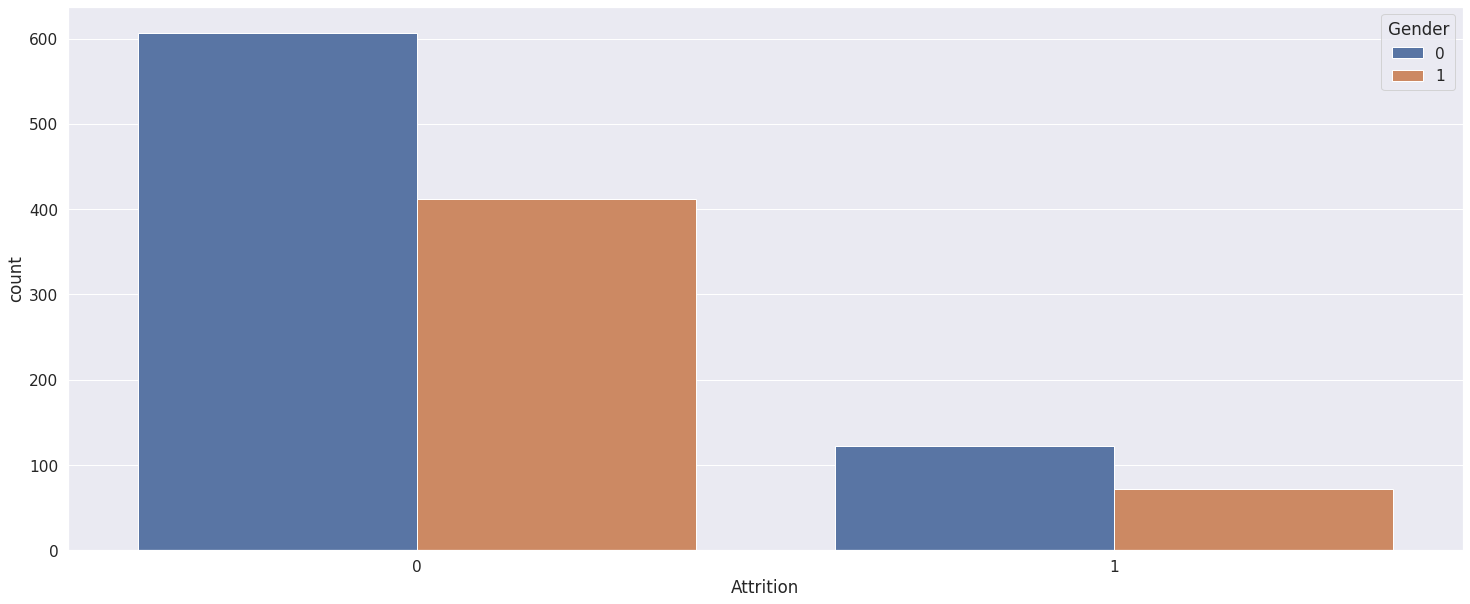

In [ ]:
countplot_fn('Attrition','Gender',df_concat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


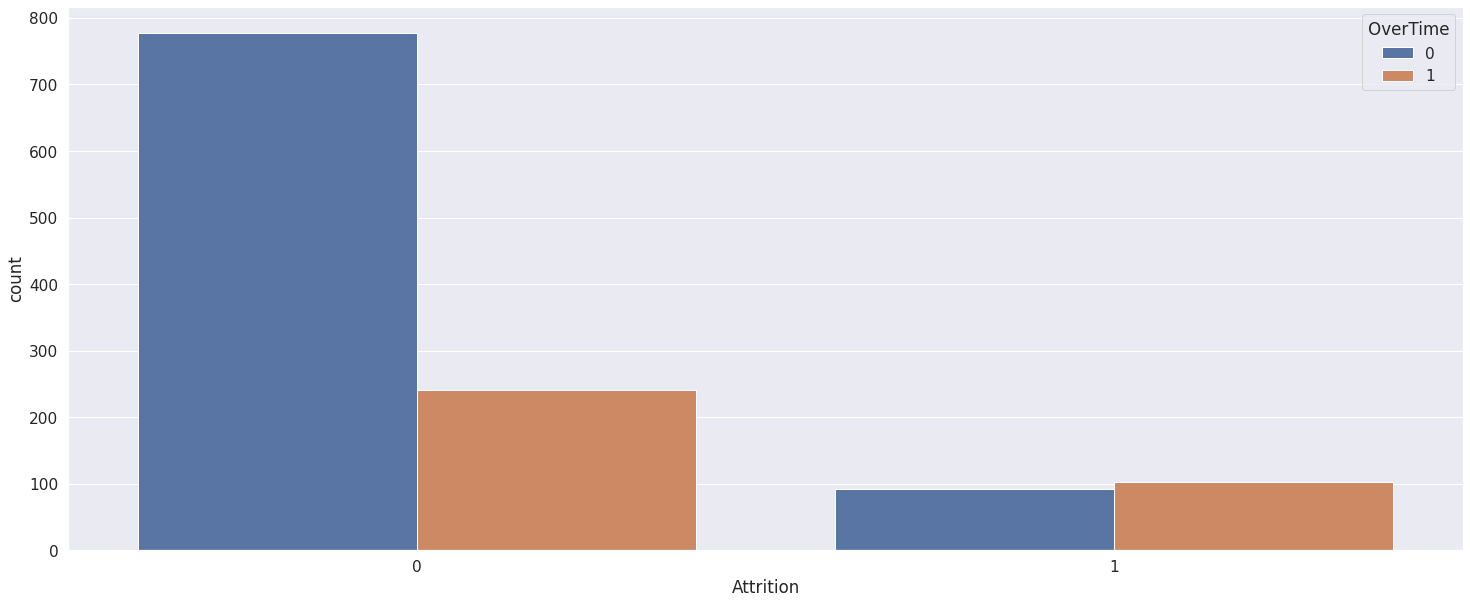

In [ ]:
countplot_fn('Attrition','OverTime',df_concat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


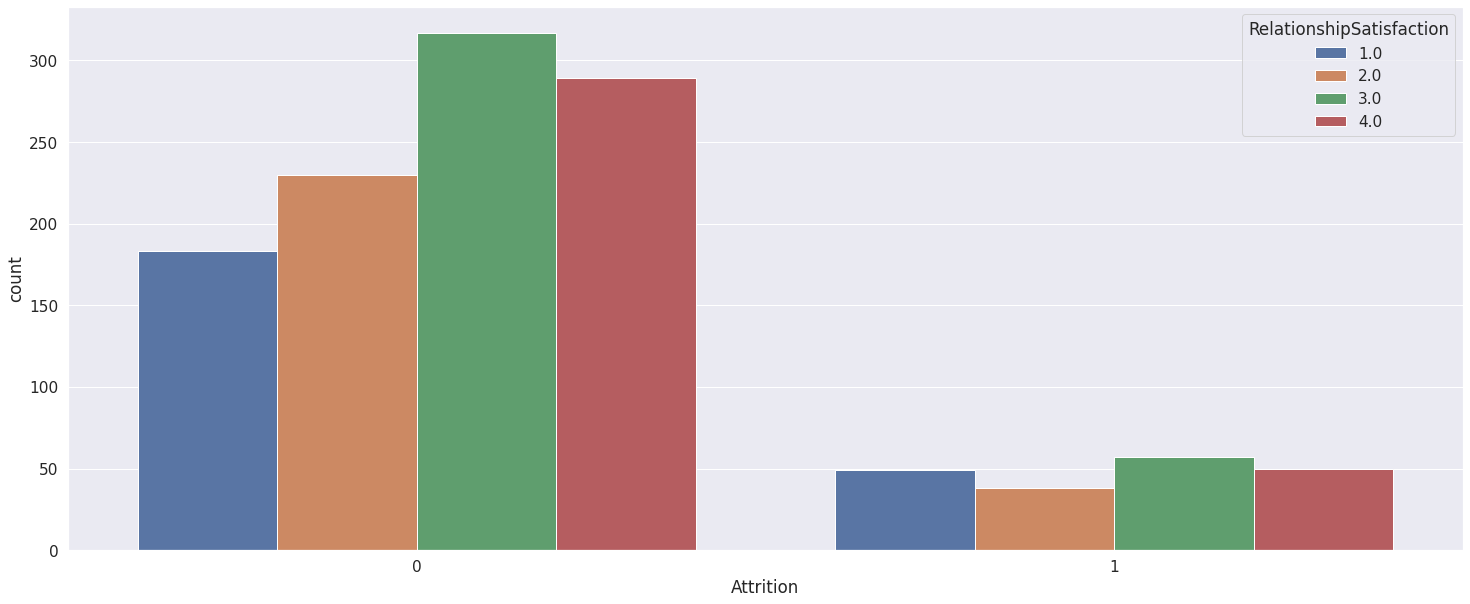

In [ ]:
countplot_fn('Attrition','RelationshipSatisfaction',df_concat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


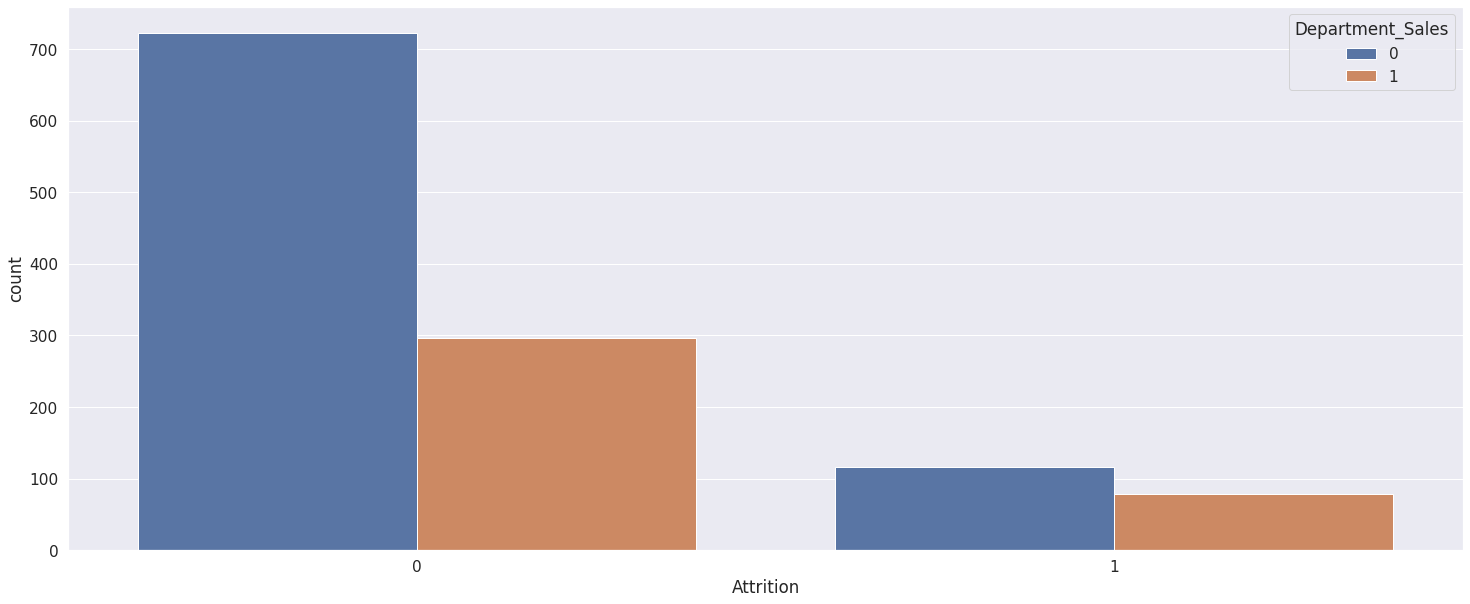

In [ ]:
countplot_fn('Attrition','Department_Sales',df_concat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


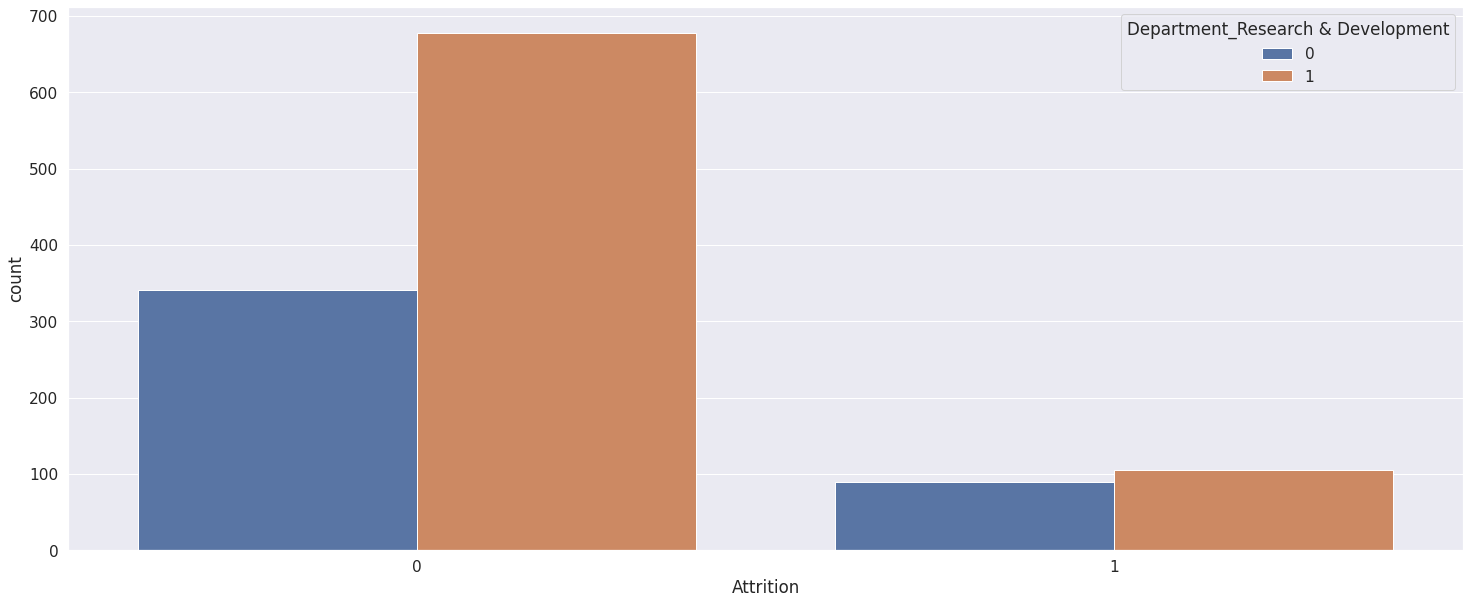

In [ ]:
countplot_fn('Attrition','Department_Research & Development',df_concat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


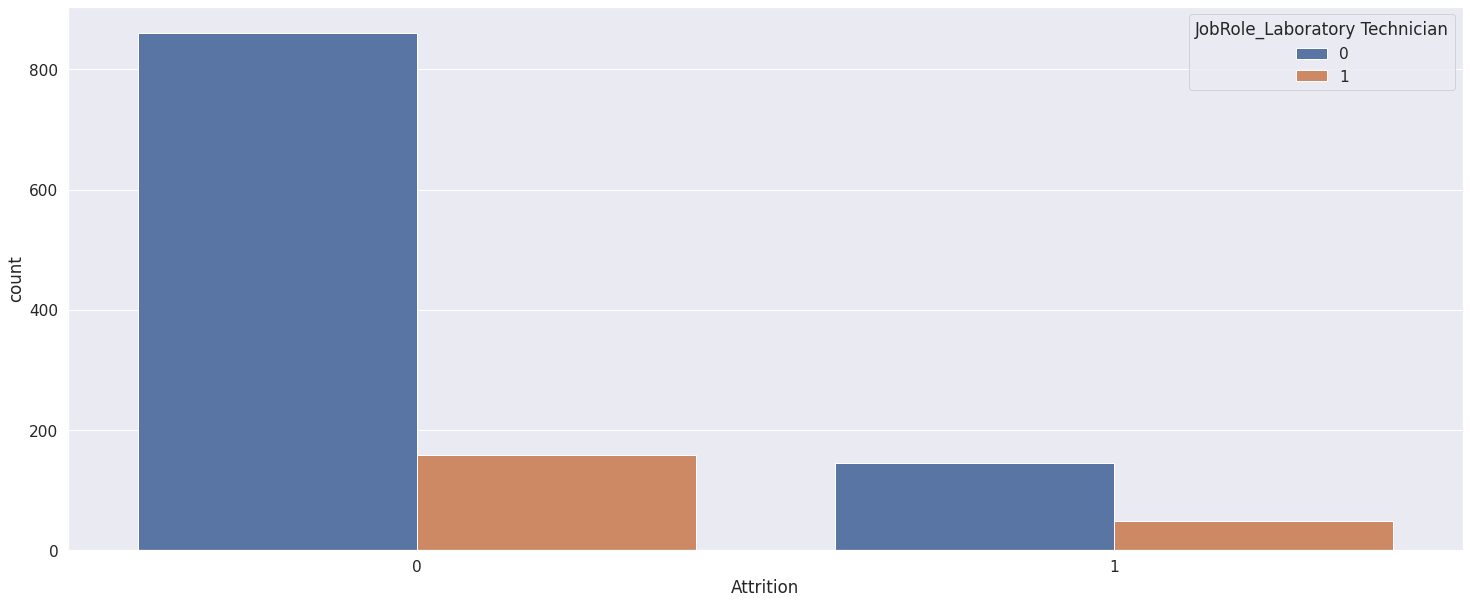

In [ ]:
countplot_fn('Attrition','JobRole_Laboratory Technician',df_concat)

In [ ]:
# to overcome the error of 'reached max limit of iterations, either scale the data or increase the max interations
#scaling the data
def scaling(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

In [ ]:
df_concat = pd.DataFrame(data=df_concat)

In [ ]:
scaling_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'CommunicationSkill', 'Experience', 'LvlGrownInOrg', 'ContributionIndex',
       'TechnicalExpertise', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'ProjectsContributed', 'YearsAtCompany']

In [ ]:
#df_temp = df_concat.loc[:,scaling_list].apply(scaling,axis= 0)
#df_temp.describe()

In [ ]:
#df_temp = pd.concat([df_temp,df_dummy,df_concat[['Gender','Over18','OverTime']]],axis=1)

Logit Function

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
df_concat = df_concat.drop(columns='ID')

In [ ]:
XX = df_concat.drop(columns=['Attrition','YearsAtCompany'])
#X = df_temp
Y = df_concat['Attrition']

In [ ]:
Y.value_counts()

0    1019
1     194
Name: Attrition, dtype: int64

Y is not balanced

Checking the accuracy by splitting training data

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# st = StandardScaler()
# X_train = st.fit_transform(X_train)
# X_test = st.fit_transform(X_test)

In [ ]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# x_train_fit, y_train_fit = oversample.fit_resample(X_train, Y_train)

In [ ]:
# lr1 = LogisticRegression()
# lr1.fit(x_train_fit,y_train_fit)

In [ ]:
# y_pred_fit = lr1.predict(X_test)
# y_pred_fit

In [ ]:
# from sklearn.metrics import classification_report, f1_score
# print(classification_report(Y_test,y_pred_fit))
# f1_score(Y_test,y_pred_fit,average=None)

In [ ]:
#rfe_features = list(X_train.columns[rfe.support_])

In [ ]:
#len(rfe_features)

In [ ]:
# y_pred_prob = lr1.predict_proba(X_test)
# y_pred_prob

In [ ]:
#Y_pred = LR.predict(X_test)
#print("Accuracy of Logistic Regression Model is {:.2f}".format(lr1.score(X_test,Y_test)))

In [ ]:
# x_train = pd.DataFrame(X_train)
# y_train = pd.DataFrame(Y_train)

In [ ]:
# x_train.head()

In [ ]:
# lgr =LogisticRegression(fit_intercept=False)
# rfe = RFE(lgr,n_features_to_select= 40) #7 are sufficient for prediction
# rfe = rfe.fit(x_train,y_train)

In [ ]:
# order = rfe.ranking_
# order

In [ ]:
# feature_ranks = []
# for i in order:
#   feature_ranks.append(f"{i}.{df_concat.columns[i]}")
# feature_ranks

In [ ]:
# rfe_features = list(x_train.columns[rfe.support_])
# rfe_x_train = x_train[rfe_features]

In [ ]:
# len(rfe_features)

In [ ]:
# from sklearn.feature_selection import SelectFromModel
# smf=SelectFromModel(lgr, threshold = np.inf, max_features=40)
# smf.fit(x_train, y_train)
# feature_idx = smf.get_support()
# feature_name = df_concat.columns[feature_idx]
# feature_name

In [ ]:
# lgr_1 = LogisticRegression()
# lgr_1.fit(rfe_x_train,y_train)

In [ ]:
# X_test = pd.DataFrame(X_test)

In [ ]:
# rfe_features

In [ ]:
# y_pred = lgr_1.predict(X_test[rfe_features])
# f1_score_array = f1_score(Y_test,y_pred, average=None)
# dict_rfe = {"Features": list(rfe_features), "F1 Score":f1_score_array}
# dict_rfe

In [ ]:
#Y_test = pd.DataFrame(Y_test)

In [ ]:
#print("Accuracy of Logistic Regression Model is {:.2f}".format(lgr_1.score(X_test,Y_test)))

In [ ]:
# cm = confusion_matrix(Y_test,y_pred)

In [ ]:
# TN = cm[0][0]
# TP = cm[1][1]
# FN = cm[1][0]
# FP = cm[0][1]
# print("Accuracy : {}".format((TP + TN)/ (TP + TN + FP + FN)))

In [ ]:
#Y_test = pd.DataFrame(Y_test)

LINEAR REGRESSION

In [ ]:
corr = df_concat.corr()
#corr

In [ ]:
sns.set(font_scale=1.4)

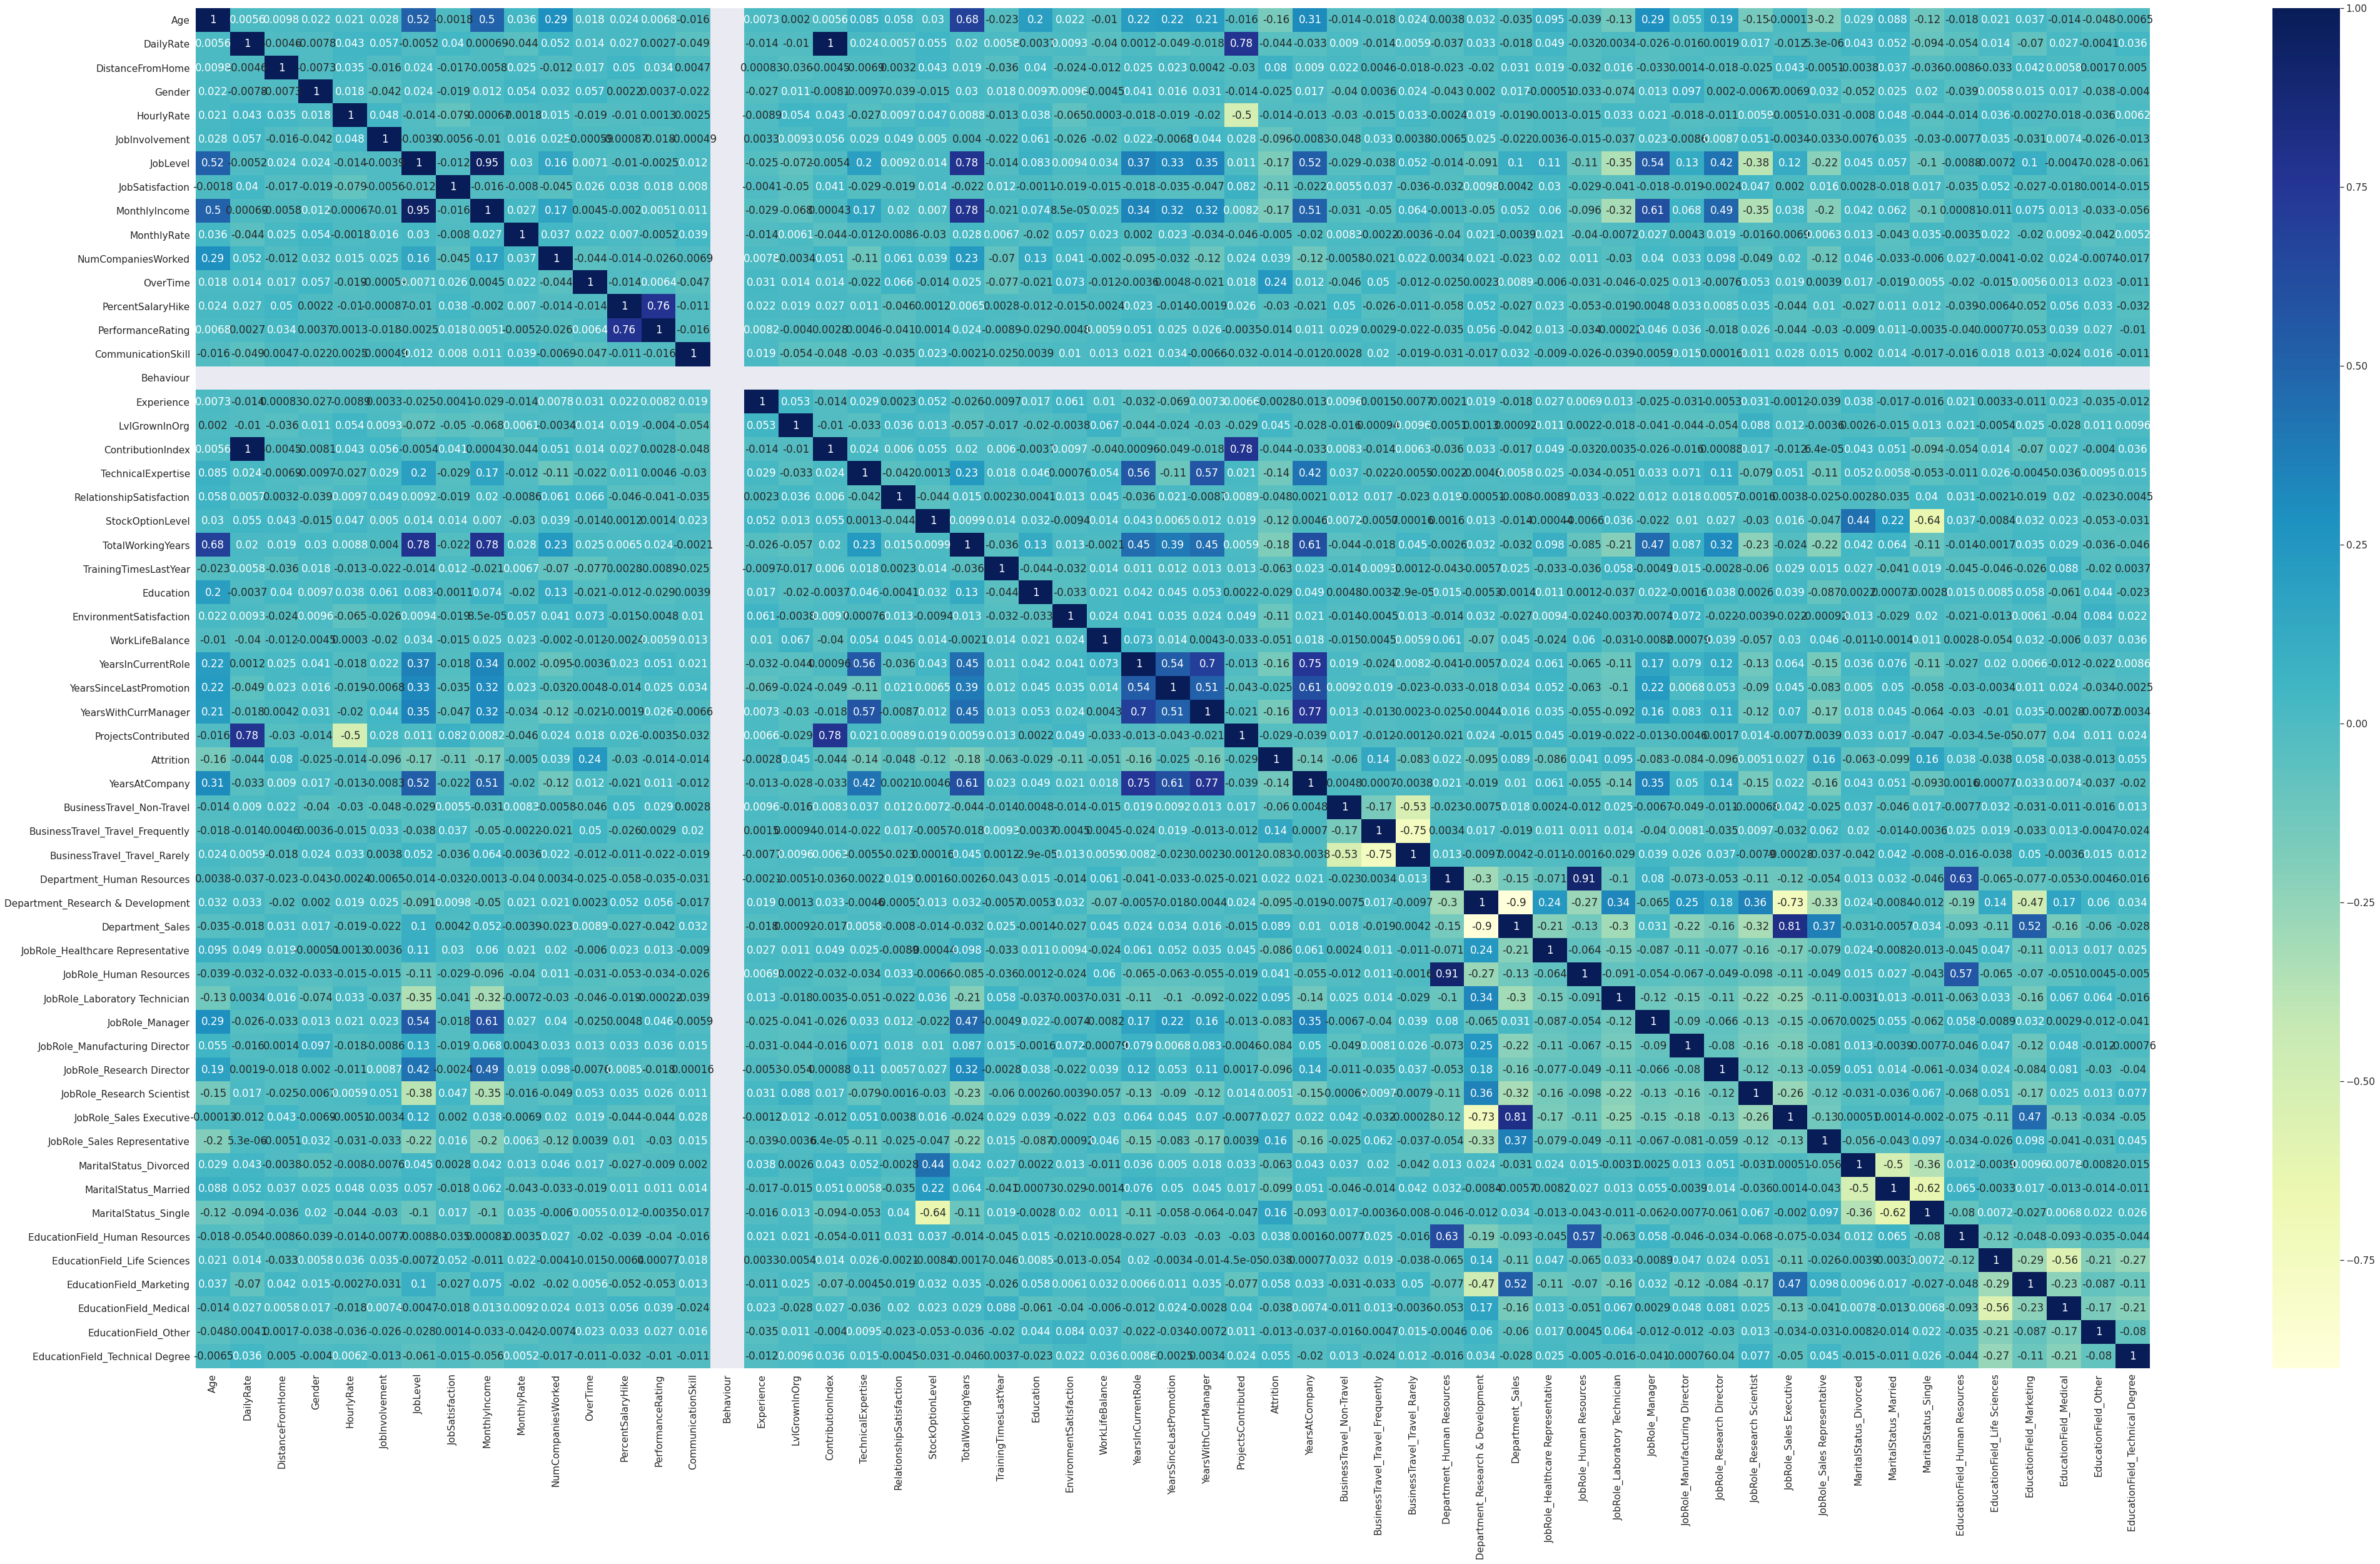

In [ ]:
import seaborn as sns
plt.figure(figsize=(70,40))
sns.heatmap(corr,cmap='YlGnBu',annot=True)

In [ ]:
df_concat.head()

,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,Attrition,YearsAtCompany,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,44.0,1376.0,1,0,91.0,2.0,3,1.0,10482,2326.0,9.0,0,14.0,3,4,1,46116,4.0,9632,9,4.0,1,24.0,1,2.0,2.0,3.0,6,3.0,6,15.0,1,20,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,25.0,675.0,5,0,85.0,4.0,2,1.0,4000,18384.0,1.0,0,12.0,3,5,1,10635,6.0,4725,7,4.0,2,6.0,2,2.0,2.0,3.0,3,1.0,5,7.0,0,6,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,57.0,210.0,29,0,56.0,2.0,4,4.0,14118,22102.0,3.0,0,12.0,3,2,1,36537,2.0,1470,0,3.0,1,32.0,3,3.0,1.0,2.0,0,0.0,0,3.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,47.0,1180.0,25,0,84.0,3.0,3,3.0,8633,13084.0,2.0,0,23.0,4,1,1,814,3.0,8260,11,2.0,0,25.0,3,3.0,1.0,3.0,14,12.0,11,14.0,0,17,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,22.0,391.0,7,0,75.0,3.0,1,2.0,2472,26092.0,1.0,1,23.0,4,3,1,46742,2.0,2737,0,1.0,0,1.0,2,1.0,4.0,3.0,0,0.0,0,5.0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
col_xl = ['JobLevel','MonthlyIncome','TotalWorkingYears','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
len(col_xl)

6

VIF

In [ ]:
col1 = col_xl + ['YearsAtCompany']

In [ ]:
corr1 = df_concat.loc[:,col1].corr()
corr1

,JobLevel,MonthlyIncome,TotalWorkingYears,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsAtCompany
JobLevel,1.000000,0.949891,0.782324,0.368412,0.329901,0.350830,0.522273
MonthlyIncome,0.949891,1.000000,0.780055,0.344756,0.321990,0.321187,0.505448
TotalWorkingYears,0.782324,0.780055,1.000000,0.454100,0.391647,0.453637,0.613429
YearsInCurrentRole,0.368412,0.344756,0.454100,1.000000,0.535246,0.699188,0.752616
YearsSinceLastPromotion,0.329901,0.321990,0.391647,0.535246,1.000000,0.510623,0.606483
YearsWithCurrManager,0.350830,0.321187,0.453637,0.699188,0.510623,1.000000,0.768440
YearsAtCompany,0.522273,0.505448,0.613429,0.752616,0.606483,0.768440,1.000000


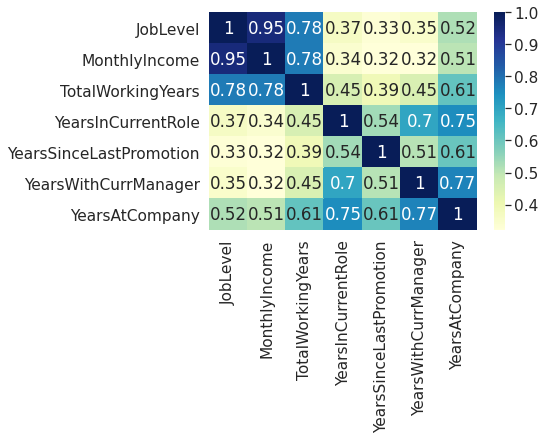

In [ ]:
#plt.figure(figsize=(70,40))
sns.heatmap(corr1,cmap='YlGnBu',annot=True)

In [ ]:
df_concat.head()

,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,Attrition,YearsAtCompany,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,44.0,1376.0,1,0,91.0,2.0,3,1.0,10482,2326.0,9.0,0,14.0,3,4,1,46116,4.0,9632,9,4.0,1,24.0,1,2.0,2.0,3.0,6,3.0,6,15.0,1,20,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,25.0,675.0,5,0,85.0,4.0,2,1.0,4000,18384.0,1.0,0,12.0,3,5,1,10635,6.0,4725,7,4.0,2,6.0,2,2.0,2.0,3.0,3,1.0,5,7.0,0,6,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,57.0,210.0,29,0,56.0,2.0,4,4.0,14118,22102.0,3.0,0,12.0,3,2,1,36537,2.0,1470,0,3.0,1,32.0,3,3.0,1.0,2.0,0,0.0,0,3.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,47.0,1180.0,25,0,84.0,3.0,3,3.0,8633,13084.0,2.0,0,23.0,4,1,1,814,3.0,8260,11,2.0,0,25.0,3,3.0,1.0,3.0,14,12.0,11,14.0,0,17,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,22.0,391.0,7,0,75.0,3.0,1,2.0,2472,26092.0,1.0,1,23.0,4,3,1,46742,2.0,2737,0,1.0,0,1.0,2,1.0,4.0,3.0,0,0.0,0,5.0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


target variable is dependent on following variables

In [ ]:
xx = ['TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion']

In [ ]:
# X = df_concat[xx]
# y = df_concat['YearsAtCompany']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# # Add a constant to get an intercept
# X_train_sm2 = sm.add_constant(X_train)

# # Fit the regression line using 'OLS'
# lr2 = sm.OLS(y_train, X_train_sm2).fit()

# # Print the parameters, i.e. the intercept and the slope of the regression line fitted
# lr2.params

In [ ]:
# print(lr2.summary())

In [ ]:
# xl = df_concat.loc[:,xx]
yl = df_concat['YearsAtCompany']

In [ ]:
# xl_train, xl_test, yl_train, yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)
#x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
# from sklearn.preprocessing import StandardScaler
# st = StandardScaler()
# xl_train = st.fit_transform(xl_train)
# xl_test = st.transform(xl_test)

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [ ]:
# lin_reg = LinearRegression()
# lin_reg.fit(xl_train, yl_train)

In [ ]:
# y_predl = lin_reg.predict(xl_test)
#y_pred

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
from numpy import math
# math.sqrt(mean_squared_error(yl_test,y_predl))

In [ ]:
#sklearn.metrics.mean_absolute_error(yl_test,y_pred)#close to zero

In [ ]:
# print(r2_score(yl_test,y_predl))

Test.csv

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Codecell_kaggle/test.csv')

In [ ]:
df_test.isnull().sum().sum()

5

In [ ]:
df_test = df_test.fillna(df_test.median())

In [ ]:
df_test.isnull().sum()

ID                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
CommunicationSkill          0
Behaviour                   0
Experience                  0
LvlGrownInOrg               0
ContributionIndex           0
TechnicalExpertise          0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
Education                   0
EducationField              0
EmployeeCo

In [ ]:
df_test = df_test.drop(columns=['Over18','StandardHours','EmployeeCount','FormalWarnings','EmployeeNumber'])
df_test

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EducationField,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed
0,1,27,Travel_Rarely,591,Research & Development,2,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3.0,1,1,26931.0,3,4137,1,4,1.0,6,3,1,Medical,1,3,2,2,2,14.0
1,2,26,Travel_Rarely,1443,Sales,23,Female,47,2,2,Sales Executive,4,Married,4157,21436,7,Yes,19,3.0,3,1,8157.0,2,10101,0,3,1.0,5,2,3,Marketing,3,2,2,0,0,30.0
2,3,50,Travel_Rarely,328,Research & Development,1,Male,86,2,1,Laboratory Technician,3,Married,3690,3425,2,No,15,3.0,1,1,7766.0,6,2296,4,4,1.0,5,2,3,Medical,3,2,2,0,2,3.0
3,4,41,Travel_Rarely,1102,Sales,1,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3.0,4,1,39304.0,1,7714,20,1,0.0,8,0,2,Life Sciences,2,1,4,0,5,11.0
4,5,28,Travel_Rarely,440,Research & Development,21,Male,42,3,1,Research Scientist,4,Married,2713,6672,1,No,11,3.0,5,1,38389.0,1,3080,4,3,1.0,5,2,3,Medical,3,1,2,0,2,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,59,Travel_Rarely,1324,Research & Development,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4.0,1,1,14562.0,5,9268,0,1,3.0,12,3,3,Medical,3,2,0,0,0,16.0
236,237,37,Travel_Rarely,1189,Sales,3,Male,87,3,3,Sales Executive,4,Single,7428,14506,2,No,12,3.0,1,1,16985.0,4,8323,4,1,0.0,12,3,3,Life Sciences,3,3,3,1,3,13.0
237,238,37,Non-Travel,1040,Research & Development,2,Male,100,2,2,Healthcare Representative,4,Divorced,5163,15850,5,No,14,3.0,3,1,40109.0,3,7280,0,4,1.0,17,2,2,Life Sciences,3,4,0,0,0,10.0
238,239,44,Non-Travel,489,Research & Development,23,Male,67,3,2,Laboratory Technician,2,Married,2042,25043,4,No,12,3.0,2,1,36368.0,6,3423,2,3,1.0,17,3,3,Medical,2,4,2,1,2,7.0


In [ ]:
df_test['Gender'] = df_test['Gender'].map({'Male': 0, 'Female': 1})
df_test['OverTime'] = df_test['OverTime'].map({'Yes': 1, 'No': 0})

In [ ]:
df_test.head()

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EducationField,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed
0,1,27,Travel_Rarely,591,Research & Development,2,0,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3.0,1,1,26931.0,3,4137,1,4,1.0,6,3,1,Medical,1,3,2,2,2,14.0
1,2,26,Travel_Rarely,1443,Sales,23,1,47,2,2,Sales Executive,4,Married,4157,21436,7,1,19,3.0,3,1,8157.0,2,10101,0,3,1.0,5,2,3,Marketing,3,2,2,0,0,30.0
2,3,50,Travel_Rarely,328,Research & Development,1,0,86,2,1,Laboratory Technician,3,Married,3690,3425,2,0,15,3.0,1,1,7766.0,6,2296,4,4,1.0,5,2,3,Medical,3,2,2,0,2,3.0
3,4,41,Travel_Rarely,1102,Sales,1,1,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3.0,4,1,39304.0,1,7714,20,1,0.0,8,0,2,Life Sciences,2,1,4,0,5,11.0
4,5,28,Travel_Rarely,440,Research & Development,21,0,42,3,1,Research Scientist,4,Married,2713,6672,1,0,11,3.0,5,1,38389.0,1,3080,4,3,1.0,5,2,3,Medical,3,1,2,0,2,10.0


In [ ]:
df_test_dummy = pd.get_dummies(df_test[['BusinessTravel','Department','JobRole','MaritalStatus','EducationField']],dtype=int)
df_test = df_test.drop(columns=['BusinessTravel','Department','JobRole','MaritalStatus','EducationField'],axis=1)

In [ ]:
df_test_concat = pd.concat([df_test,df_test_dummy],axis=1)
df_test_concat.head()

,ID,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1,27,591,2,0,40,3,1,2,3468,16632,9,0,12,3.0,1,1,26931.0,3,4137,1,4,1.0,6,3,1,1,3,2,2,2,14.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2,26,1443,23,1,47,2,2,4,4157,21436,7,1,19,3.0,3,1,8157.0,2,10101,0,3,1.0,5,2,3,3,2,2,0,0,30.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,3,50,328,1,0,86,2,1,3,3690,3425,2,0,15,3.0,1,1,7766.0,6,2296,4,4,1.0,5,2,3,3,2,2,0,2,3.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,4,41,1102,1,1,94,3,2,4,5993,19479,8,1,11,3.0,4,1,39304.0,1,7714,20,1,0.0,8,0,2,2,1,4,0,5,11.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,5,28,440,21,0,42,3,1,4,2713,6672,1,0,11,3.0,5,1,38389.0,1,3080,4,3,1.0,5,2,3,3,1,2,0,2,10.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
df_test_concat = df_test_concat.drop(columns='ID')

In [ ]:
df_test_concat

,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,27,591,2,0,40,3,1,2,3468,16632,9,0,12,3.0,1,1,26931.0,3,4137,1,4,1.0,6,3,1,1,3,2,2,2,14.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,26,1443,23,1,47,2,2,4,4157,21436,7,1,19,3.0,3,1,8157.0,2,10101,0,3,1.0,5,2,3,3,2,2,0,0,30.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,50,328,1,0,86,2,1,3,3690,3425,2,0,15,3.0,1,1,7766.0,6,2296,4,4,1.0,5,2,3,3,2,2,0,2,3.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,41,1102,1,1,94,3,2,4,5993,19479,8,1,11,3.0,4,1,39304.0,1,7714,20,1,0.0,8,0,2,2,1,4,0,5,11.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,28,440,21,0,42,3,1,4,2713,6672,1,0,11,3.0,5,1,38389.0,1,3080,4,3,1.0,5,2,3,3,1,2,0,2,10.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,59,1324,3,1,81,4,1,1,2670,9964,4,1,20,4.0,1,1,14562.0,5,9268,0,1,3.0,12,3,3,3,2,0,0,0,16.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
236,37,1189,3,0,87,3,3,4,7428,14506,2,0,12,3.0,1,1,16985.0,4,8323,4,1,0.0,12,3,3,3,3,3,1,3,13.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
237,37,1040,2,0,100,2,2,4,5163,15850,5,0,14,3.0,3,1,40109.0,3,7280,0,4,1.0,17,2,2,3,4,0,0,0,10.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
238,44,489,23,0,67,3,2,2,2042,25043,4,0,12,3.0,2,1,36368.0,6,3423,2,3,1.0,17,3,3,2,4,2,1,2,7.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
df_concat.drop(columns=['Attrition','YearsAtCompany'])

,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,44.0,1376.0,1,0,91.0,2.0,3,1.0,10482,2326.0,9.0,0,14.0,3,4,1,46116,4.0,9632,9,4.0,1,24.0,1,2.0,2.0,3.0,6,3.0,6,15.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,25.0,675.0,5,0,85.0,4.0,2,1.0,4000,18384.0,1.0,0,12.0,3,5,1,10635,6.0,4725,7,4.0,2,6.0,2,2.0,2.0,3.0,3,1.0,5,7.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,57.0,210.0,29,0,56.0,2.0,4,4.0,14118,22102.0,3.0,0,12.0,3,2,1,36537,2.0,1470,0,3.0,1,32.0,3,3.0,1.0,2.0,0,0.0,0,3.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,47.0,1180.0,25,0,84.0,3.0,3,3.0,8633,13084.0,2.0,0,23.0,4,1,1,814,3.0,8260,11,2.0,0,25.0,3,3.0,1.0,3.0,14,12.0,11,14.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,22.0,391.0,7,0,75.0,3.0,1,2.0,2472,26092.0,1.0,1,23.0,4,3,1,46742,2.0,2737,0,1.0,0,1.0,2,1.0,4.0,3.0,0,0.0,0,5.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,29.0,806.0,7,1,39.0,3.0,1,3.0,3339,17285.0,3.0,1,13.0,3,5,1,17742,6.0,5642,6,1.0,2,10.0,2,3.0,2.0,3.0,7,7.0,7,20.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1226,41.0,582.0,28,1,60.0,2.0,4,2.0,13570,5640.0,0.0,0,23.0,4,2,1,43074,2.0,4074,70,3.0,1,21.0,3,4.0,1.0,3.0,7,0.0,10,9.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1227,36.0,1456.0,13,0,96.0,2.0,2,1.0,6134,8658.0,5.0,1,13.0,3,3,1,41358,6.0,10192,1,2.0,3,16.0,3,5.0,2.0,3.0,2,2.0,2,15.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1228,23.0,885.0,4,0,58.0,4.0,1,1.0,2819,8544.0,2.0,0,16.0,3,2,1,8520,1.0,6195,4,1.0,1,5.0,3,3.0,1.0,4.0,2,0.0,2,15.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


Attrition Prediction

In [ ]:
lgr =LogisticRegression(fit_intercept=False)
rfe = RFE(lgr,n_features_to_select= 40) #7 are sufficient for prediction

rfe = rfe.fit(X,Y)
rfe_features = list(X.columns[rfe.support_])
rfe_x_train = X[rfe_features]

lgr_1 = LogisticRegression()
lgr_1.fit(rfe_x_train,Y)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred1 = lgr_1.predict_proba(df_test_concat[rfe_features])
#f1_score_array = f1_score(Y_test,y_pred, average=None)
#dict_rfe = {"Features": list(rfe_features), "F1 Score":f1_score_array}
#dict_rfe

In [ ]:
y_pred1

array([[0.76481055, 0.23518945],
       [0.74668955, 0.25331045],
       [0.79523273, 0.20476727],
       [0.8809539 , 0.1190461 ],
       [0.79523273, 0.20476727],
       [0.76098392, 0.23901608],
       [0.87263348, 0.12736652],
       [0.83552356, 0.16447644],
       [0.9431403 , 0.0568597 ],
       [0.74561859, 0.25438141],
       [0.70496328, 0.29503672],
       [0.69560632, 0.30439368],
       [0.76481055, 0.23518945],
       [0.70054417, 0.29945583],
       [0.96418101, 0.03581899],
       [0.7281944 , 0.2718056 ],
       [0.76481055, 0.23518945],
       [0.90063371, 0.09936629],
       [0.83406477, 0.16593523],
       [0.78693068, 0.21306932],
       [0.92954744, 0.07045256],
       [0.90171311, 0.09828689],
       [0.65600853, 0.34399147],
       [0.76290256, 0.23709744],
       [0.81249013, 0.18750987],
       [0.82312515, 0.17687485],
       [0.92657118, 0.07342882],
       [0.85849128, 0.14150872],
       [0.67550323, 0.32449677],
       [0.7969498 , 0.2030502 ],
       [0.

In [ ]:
y_pred1_list = []
for i in y_pred1:
  y_pred1_list.append(i[1])


In [ ]:
y_pred1_list

[0.23518944962287774,
 0.2533104536027947,
 0.20476727424295987,
 0.1190461011008999,
 0.20476727424295987,
 0.23901607985458234,
 0.1273665161790519,
 0.1644764374012481,
 0.05685969543288115,
 0.25438140917960056,
 0.2950367196533289,
 0.3043936760581027,
 0.23518944962287774,
 0.2994558292933531,
 0.03581899104064668,
 0.271805598506404,
 0.23518944962287774,
 0.09936629081492787,
 0.16593523037230493,
 0.21306931684535715,
 0.07045256445752836,
 0.09828689299118767,
 0.34399146714898754,
 0.23709744404191124,
 0.1875098669983732,
 0.1768748548484356,
 0.07342882266611515,
 0.14150872387581417,
 0.32449676707231634,
 0.2030502047582538,
 0.13428039631560984,
 0.2835462958268324,
 0.19953157770025437,
 0.22161415365797013,
 0.04255633911964117,
 0.28685532951666254,
 0.02149562056966022,
 0.1395482553816925,
 0.1404146207504537,
 0.0679967569854123,
 0.08410457806842979,
 0.09613363391282813,
 0.25310092304597753,
 0.0632336165821536,
 0.04616000436098473,
 0.31586447939156376,
 0.22

In [ ]:
df_test_concat.shape

(240, 55)

YearsAtCompany Prediction

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, yl)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg_rfe = LinearRegression()
rfe_lin = RFE(lin_reg_rfe,n_features_to_select= 3) #3 are sufficient for prediction

rfe_lin = rfe_lin.fit(X,yl)
rfe_features_lin = list(X.columns[rfe.support_])
rfe_x_train_lin = X[rfe_features_lin]

lin_1 = LinearRegression()
lin_1.fit(rfe_x_train_lin,yl)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_lin = lin_1.predict(df_test_concat[rfe_features_lin])

In [ ]:
y_pred_lin = y_pred_lin.astype(np.int64)
y_pred_lin

array([ 3,  1,  2,  6,  2,  1,  5,  5, 15,  2,  2,  1,  3,  0, 14,  5,  3,
        5,  4,  3, 10,  7,  0,  2,  2,  4,  9,  4,  2,  4,  5,  0,  1,  4,
       13,  1, 12,  4,  5,  7, 13, 12,  7, 20,  9,  0,  3,  1,  0,  4,  9,
        2,  8,  3,  8,  0, 24, 10,  3, 22,  7, 10,  8,  6, 16,  0, 10,  9,
       14,  6, 17,  0, 17, 11,  3,  4,  0, 16,  2,  3,  8,  2,  3, 17, 13,
        5,  9,  3, 18, 12, 15,  8,  4,  2, 10,  1,  4, 15,  1, 11,  7, 10,
       13,  9,  4,  2, 20,  3,  5, 12, 10,  7,  8,  9,  5,  7, 10, 10,  3,
        6,  4,  1, 11, 17,  8,  1, 10, 12,  1,  5,  5,  1, 12,  4,  5, 10,
       17,  4, 17,  3,  7,  9,  2,  0, 19, 13,  8,  2,  4, 13,  5,  5, 22,
       13, 11,  9,  3, 10,  3,  3,  5,  3,  5,  6,  9,  2, 24,  6,  0,  0,
        6, 12,  3,  3, 11,  5,  6, 13,  3, 16, 12, 13,  0,  1, 17,  7,  0,
        1,  2,  2,  4,  5,  2, 10,  8,  3,  2,  9,  9,  8,  6,  8,  6,  6,
        8,  3,  3,  5, 17,  5,  4,  4, 10,  2,  4, 10,  9,  4,  2, 11,  4,
       22,  9,  2,  2,  8

In [ ]:
# import statsmodels.api as sm
# # with statsmodels
# X = sm.add_constant(rfe_x_train_lin) # adding a constant
 
# model = sm.OLS(yl, X).fit()
# predictions = model.predict(X) 
 
# print_model = model.summary()
# print(print_model)

In [ ]:
# y_pred2 = lin_reg.predict(df_test_concat)
# y_pred2 = y_pred2.astype(np.int64)

In [ ]:
print(y_pred1[0][0])
print(df['Attrition'][0])

0.7648105503771223
1


In [ ]:
# print(r2_score(df_test_concat,y_pred2.round()))

Random Forest Classifier

In [ ]:
X.shape

(1213, 3)

In [ ]:
X.shape

(1213, 3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50,n_jobs=-1,)
classifier.fit(XX, Y)
y_pred = classifier.predict_proba(df_test_concat)

In [ ]:
y_pred_list = []
for i in y_pred:
  y_pred_list.append(i[1])

In [ ]:
y_pred_list

[0.16,
 0.38,
 0.1,
 0.22,
 0.22,
 0.38,
 0.16,
 0.06,
 0.06,
 0.1,
 0.28,
 0.5,
 0.24,
 0.3,
 0.04,
 0.1,
 0.28,
 0.14,
 0.12,
 0.18,
 0.28,
 0.12,
 0.52,
 0.38,
 0.12,
 0.14,
 0.18,
 0.12,
 0.18,
 0.1,
 0.3,
 0.28,
 0.2,
 0.2,
 0.12,
 0.34,
 0.24,
 0.0,
 0.16,
 0.06,
 0.0,
 0.04,
 0.26,
 0.16,
 0.14,
 0.14,
 0.22,
 0.1,
 0.6,
 0.24,
 0.1,
 0.42,
 0.04,
 0.3,
 0.0,
 0.36,
 0.34,
 0.18,
 0.3,
 0.02,
 0.06,
 0.14,
 0.26,
 0.12,
 0.06,
 0.2,
 0.1,
 0.1,
 0.08,
 0.06,
 0.1,
 0.4,
 0.2,
 0.24,
 0.02,
 0.32,
 0.44,
 0.08,
 0.2,
 0.54,
 0.04,
 0.22,
 0.28,
 0.08,
 0.08,
 0.16,
 0.14,
 0.14,
 0.14,
 0.1,
 0.02,
 0.08,
 0.08,
 0.26,
 0.04,
 0.32,
 0.04,
 0.12,
 0.52,
 0.1,
 0.04,
 0.24,
 0.02,
 0.1,
 0.1,
 0.12,
 0.18,
 0.02,
 0.26,
 0.04,
 0.12,
 0.28,
 0.04,
 0.26,
 0.12,
 0.06,
 0.08,
 0.16,
 0.2,
 0.12,
 0.08,
 0.4,
 0.04,
 0.16,
 0.1,
 0.28,
 0.14,
 0.02,
 0.24,
 0.02,
 0.22,
 0.24,
 0.32,
 0.08,
 0.18,
 0.08,
 0.32,
 0.06,
 0.14,
 0.08,
 0.02,
 0.12,
 0.28,
 0.56,
 0.02,
 0.12,
 0.06,
 0

SVM

In [ ]:
# T5.1: Deploy the 'SVC' model using the 'fit()' function.
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#svc_model = svm.SVC(kernel='poly')
#svc_model = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
from sklearn.svm import SVC
svc_model = make_pipeline(StandardScaler(), SVC(gamma='scale',class_weight='balanced',probability=True))
#svc_model.fit(X, y)
svc_model.fit(XX, Y)
#svc_model.score(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
y_pred_svm = svc_model.predict_proba(df_test_concat)
y_pred_svm

array([[0.48080539, 0.51919461],
       [0.39813235, 0.60186765],
       [0.90267004, 0.09732996],
       [0.60643363, 0.39356637],
       [0.92832134, 0.07167866],
       [0.48255896, 0.51744104],
       [0.94508806, 0.05491194],
       [0.87998179, 0.12001821],
       [0.80520722, 0.19479278],
       [0.88468618, 0.11531382],
       [0.89318082, 0.10681918],
       [0.87857463, 0.12142537],
       [0.79425226, 0.20574774],
       [0.68271281, 0.31728719],
       [0.96811308, 0.03188692],
       [0.94881667, 0.05118333],
       [0.88828481, 0.11171519],
       [0.91963729, 0.08036271],
       [0.83374219, 0.16625781],
       [0.85492251, 0.14507749],
       [0.93882309, 0.06117691],
       [0.83823854, 0.16176146],
       [0.69548962, 0.30451038],
       [0.79366996, 0.20633004],
       [0.90776544, 0.09223456],
       [0.9125773 , 0.0874227 ],
       [0.82203379, 0.17796621],
       [0.82271452, 0.17728548],
       [0.96019966, 0.03980034],
       [0.95124117, 0.04875883],
       [0.

In [ ]:
y_pred_list2 = []
for i in y_pred_svm:
  y_pred_list2.append(i[1])

In [ ]:
y_pred_list2

[0.5191946060077708,
 0.6018676459324411,
 0.09732995800133608,
 0.39356637310504666,
 0.0716786614719048,
 0.5174410437155637,
 0.05491194196843477,
 0.12001820890453087,
 0.19479277593817165,
 0.11531382087941595,
 0.10681918468364063,
 0.12142537078063032,
 0.20574773900558507,
 0.31728719058477894,
 0.03188692456881627,
 0.0511833325804419,
 0.11171519106143753,
 0.0803627084343682,
 0.1662578105321366,
 0.14507749348545532,
 0.0611769087654415,
 0.16176145961754143,
 0.3045103774403233,
 0.20633003534886116,
 0.09223456226273374,
 0.08742270165957473,
 0.17796621489838102,
 0.1772854791637833,
 0.039800340168941545,
 0.04875883154293529,
 0.2386449104380033,
 0.327881163106544,
 0.195240250918886,
 0.15582579004215233,
 0.13819668789106226,
 0.1497038699800603,
 0.05266851479234849,
 0.014422837143765271,
 0.12972327000623582,
 0.011855785388245778,
 0.08062154857464267,
 0.041819361451385796,
 0.2616192290080855,
 0.10983774728363487,
 0.1276641374923023,
 0.13933427661891745,
 0

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(XX,Y)

#Predict Output
predicted= model.predict_proba(df_test_concat) # 0:Overcast, 2:Mild
#print "Predicted Value:", predicted

In [ ]:
y_pred_list3 = []
for i in predicted:
  y_pred_list3.append(i[1])

In [ ]:
y_pred_list3

[0.8088745693795805,
 0.8288681738671744,
 0.4558102471818021,
 0.45504719868098514,
 0.6551452462145586,
 0.8054116876132347,
 0.414262031276827,
 0.06813300510182108,
 0.0010330017350173774,
 0.43901537975864235,
 0.7022983117985182,
 0.5486035385774962,
 0.6458945833499012,
 0.7609009112435895,
 3.703773135364116e-08,
 0.6537547859868817,
 0.6189058490185907,
 0.024631625634232747,
 0.7641546188692008,
 0.5162649692981752,
 0.05132432332904494,
 0.0027052087110615757,
 0.9395167478136663,
 0.7679895729750628,
 0.10030931774885832,
 0.7066637014092239,
 0.06506378634811524,
 0.30657528293807385,
 0.294234196050542,
 0.22141818969877644,
 0.6852105158970835,
 0.936045633680839,
 0.4889117304488398,
 0.5535732046754137,
 7.0520713765231235e-06,
 0.5682737931624136,
 1.0657197345990467e-05,
 0.04319275197424287,
 0.2533610886623611,
 0.06125699940764239,
 0.0001550660723825361,
 0.000904971854958331,
 0.3434829426583973,
 2.4674420510239512e-05,
 3.1248515141107737e-06,
 0.5515938503184

Random Forest Regressor

In [ ]:
df_concat_1 = df_concat.drop(columns=['Attrition','YearsAtCompany'])
df_concat_1.shape

(1213, 55)

In [ ]:
# ab = [totalworkingyears, years with manager, curr role]

In [ ]:
xx = ['TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion']
xx_x = df_concat_1.loc[:,xx]

In [ ]:
df_test_concat_1 = df_test_concat.loc[:,xx]

In [ ]:
df_test_concat_1.shape

(240, 3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50,n_jobs=-1,)
regressor.fit(xx_x, yl)
y_pred_reg = regressor.predict(df_test_concat_1)

In [ ]:
y_pred_reg = y_pred_reg.astype(np.int64)

In [ ]:
y_pred_reg

array([ 2,  1,  3,  6,  3,  1,  6,  4, 14,  2,  2,  2,  2,  0, 13,  4,  2,
        4,  4,  4,  9,  7,  1,  4,  2,  4,  8,  4,  1,  4,  5,  0,  4,  2,
       14,  1,  8,  3,  9,  8, 19, 12,  8, 26,  2,  0,  4,  1,  0,  4,  8,
        6,  8,  2,  8,  0, 22,  8,  5, 18,  8, 10,  8,  2, 18,  0, 10,  7,
       11,  2, 15,  0, 24,  8,  4,  4,  0, 18,  3,  5,  7,  5,  2, 20, 19,
        4,  9,  3, 23, 15, 12,  7,  4,  1,  9,  1,  4, 14,  1, 13,  7, 13,
       13,  9,  4,  2, 30,  0,  5, 12,  7,  4,  8,  9,  3,  7, 14, 10,  3,
        5,  2,  1, 12, 20,  7,  1, 12,  7,  1,  5,  3,  1, 11,  7,  5, 11,
       14,  5, 19,  2,  7,  9,  2,  1, 16, 11,  8,  2,  5, 12,  5,  4, 20,
       10,  9,  8,  2,  9,  5,  3,  5,  1,  5,  3,  7,  0, 21,  4,  0,  0,
        6,  9,  2,  5, 11,  2,  5, 14,  4, 19, 12,  9,  1,  3, 17,  7,  0,
        1,  3,  2,  5,  5,  5,  9,  8,  4,  6,  4,  8,  8,  2,  7,  4,  5,
        7,  1,  4,  9, 18,  4,  2,  4,  9,  3,  4, 10,  9,  1,  3,  9,  5,
       34,  9,  3,  4,  8

Linear Regression without RFE

In [ ]:
lin_reg_1 = LinearRegression()
lin_reg_1.fit(xx_x, yl)
y_pred_2 = lin_reg_1.predict(df_test_concat_1)
y_pred_2 = y_pred_2.astype(np.int64)
y_pred_2

array([ 3,  1,  2,  6,  2,  1,  5,  5, 15,  2,  2,  1,  3,  0, 14,  5,  3,
        5,  4,  3, 10,  7,  0,  2,  2,  4,  9,  4,  2,  4,  5,  0,  1,  4,
       13,  1, 12,  4,  5,  7, 13, 12,  7, 20,  9,  0,  3,  1,  0,  4,  9,
        2,  8,  3,  8,  0, 24, 10,  3, 22,  7, 10,  8,  6, 16,  0, 10,  9,
       14,  6, 17,  0, 17, 11,  3,  4,  0, 16,  2,  3,  8,  2,  3, 17, 13,
        5,  9,  3, 18, 12, 15,  8,  4,  2, 10,  1,  4, 15,  1, 11,  7, 10,
       13,  9,  4,  2, 20,  3,  5, 12, 10,  7,  8,  9,  5,  7, 10, 10,  3,
        6,  4,  1, 11, 17,  8,  1, 10, 12,  1,  5,  5,  1, 12,  4,  5, 10,
       17,  4, 17,  3,  7,  9,  2,  0, 19, 13,  8,  2,  4, 13,  5,  5, 22,
       13, 11,  9,  3, 10,  3,  3,  5,  3,  5,  6,  9,  2, 24,  6,  0,  0,
        6, 12,  3,  3, 11,  5,  6, 13,  3, 16, 12, 13,  0,  1, 17,  7,  0,
        1,  2,  2,  4,  5,  2, 10,  8,  3,  2,  9,  9,  8,  6,  8,  6,  6,
        8,  3,  3,  5, 17,  5,  4,  4, 10,  2,  4, 10,  9,  4,  2, 11,  4,
       22,  9,  2,  2,  8

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model ,XX, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.755


In [ ]:
ID = df_test['ID']
submission_df_1 = pd.DataFrame({
                  "ID": ID, 
                  "Attrition": y_pred_list2,
                  "YearsAtCompany": y_pred_reg })

In [ ]:
from google.colab import files
csv_file = submission_df_1.to_csv(index=False) # 'new_df' is the source DataFrame from which the required CSV file is to be created.

with open('data.csv', 'w') as f: # 'data.csv' is the name of the required CSV file.
  f.write(csv_file)

files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>